In [95]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import numpy as np

matplotlib.style.use('ggplot')

In [96]:
cleaned=pd.read_csv("D:/github/dataSets/dpa_project/updatedcleanedvehicles.csv")

In [97]:
df_copy = cleaned.copy()

## Exploratory Data Analysis

### Visualize the Pearson Correlation of the numerical data

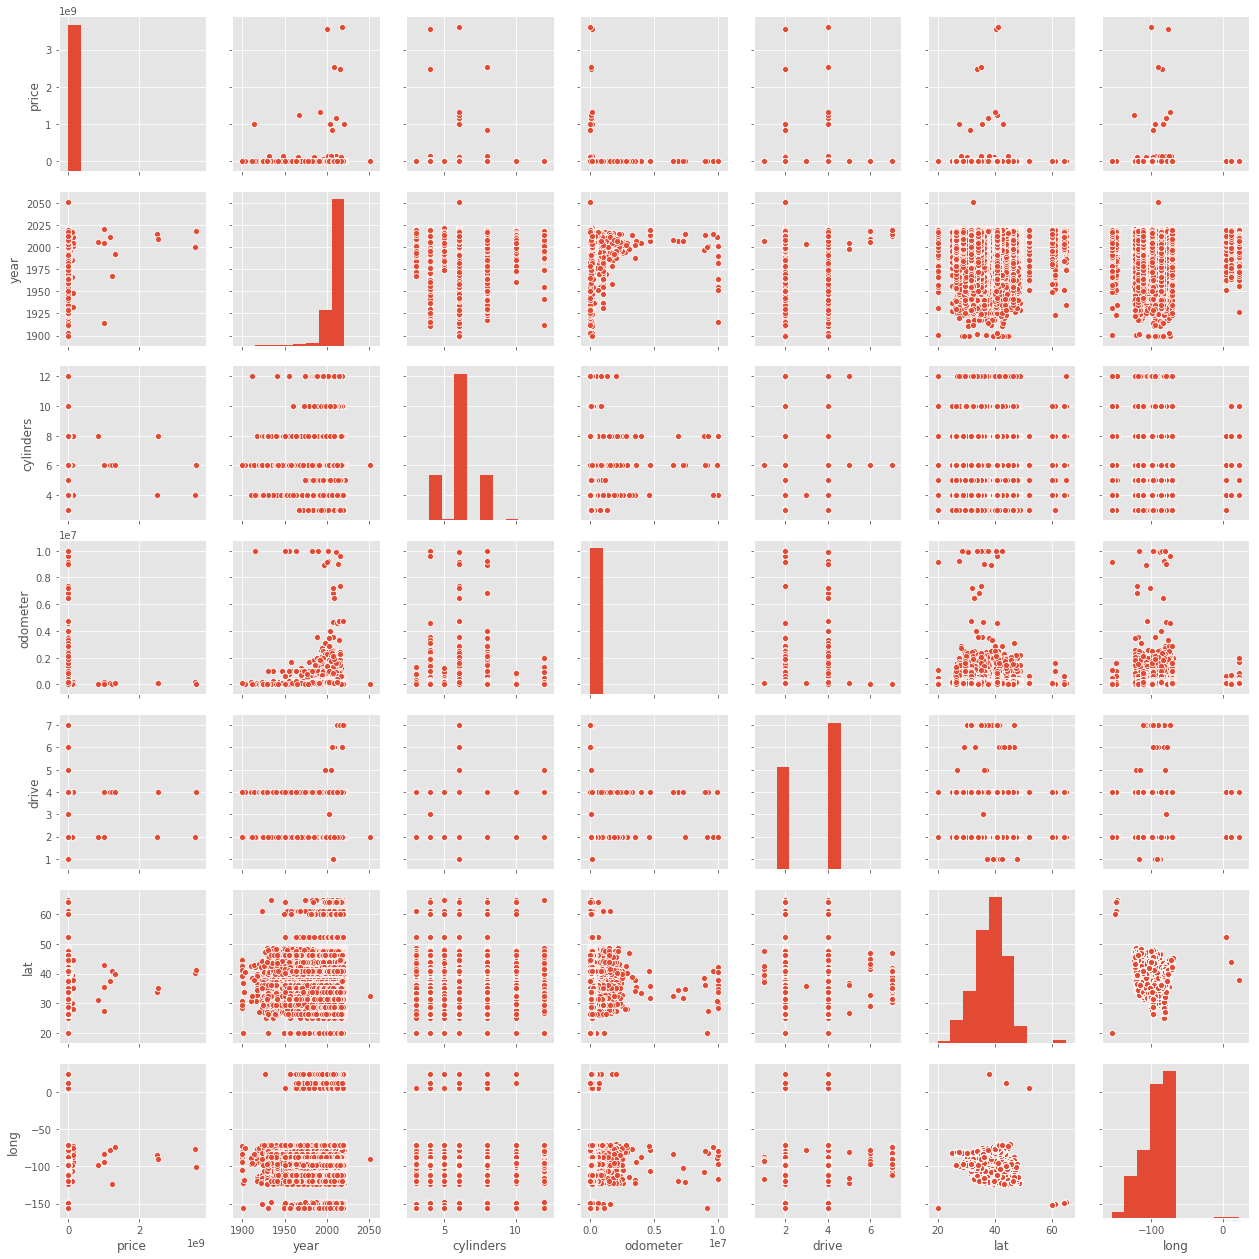

In [98]:
sns.pairplot(cleaned.loc[:,"price":"long"])
plt.show()

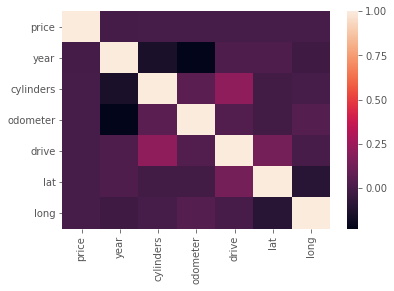

In [7]:
sns.heatmap(cleaned.loc[:,"price":"long"].corr())

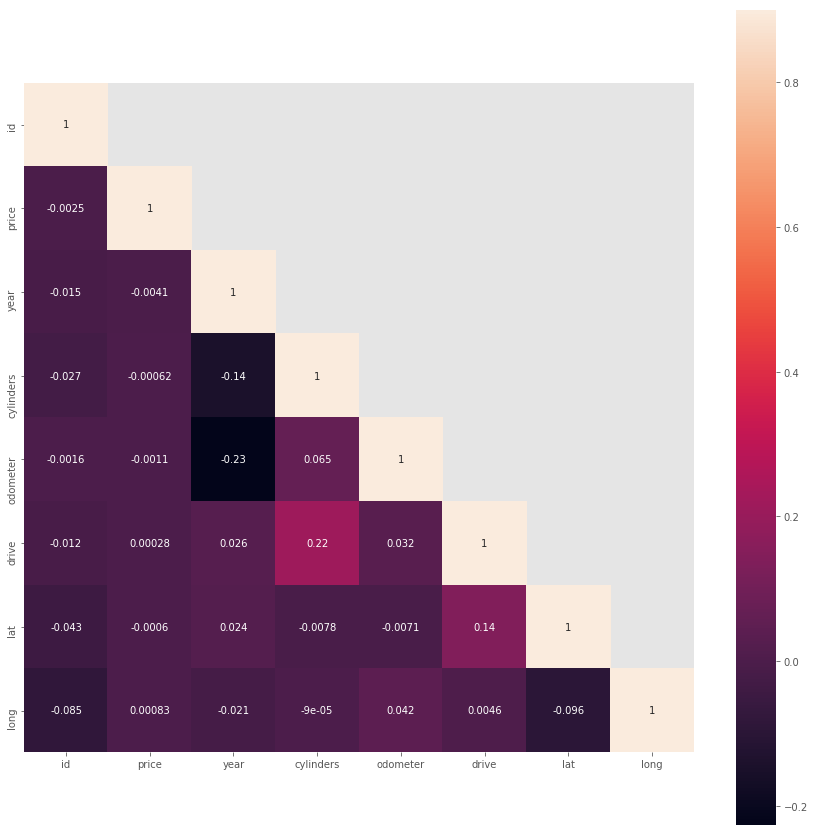

In [8]:
#create correlation
corr = cleaned.corr(method = 'pearson')

#convert correlation to numpy array
mask = np.array(corr)

#to mask the repetitive value for each pair
mask[np.tril_indices_from(mask)] = False
fig, ax = plt.subplots(figsize = (15,12))
fig.set_size_inches(15,15)
sns.heatmap(corr, mask = mask, vmax = 0.9, square = True, annot = True)

In [14]:
cleaned.loc[:,"price":"long"].corr()

,price,year,cylinders,odometer,drive,lat,long
price,1.000000,-0.004102,-0.000621,-0.001053,0.000276,-0.000595,0.000833
year,-0.004102,1.000000,-0.144102,-0.226688,0.025720,0.023961,-0.020784
cylinders,-0.000621,-0.144102,1.000000,0.064717,0.216314,-0.007766,-0.000090
odometer,-0.001053,-0.226688,0.064717,1.000000,0.032304,-0.007128,0.041995
drive,0.000276,0.025720,0.216314,0.032304,1.000000,0.142215,0.004616
lat,-0.000595,0.023961,-0.007766,-0.007128,0.142215,1.000000,-0.095712
long,0.000833,-0.020784,-0.000090,0.041995,0.004616,-0.095712,1.000000


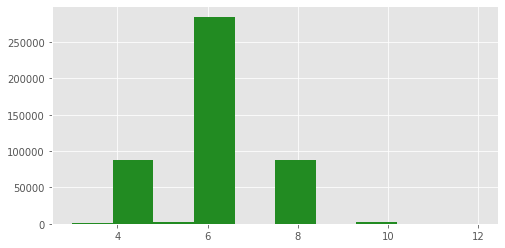

In [21]:
cleaned["cylinders"].hist(color="forestgreen")

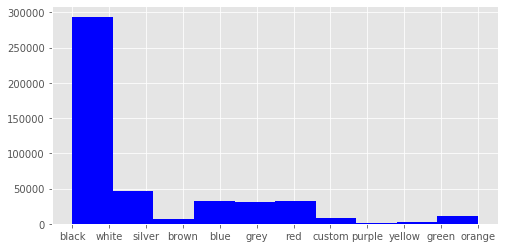

In [20]:
plt.rcParams['figure.figsize'] = [8, 4]
cleaned["paint_color"].hist(color="blue")

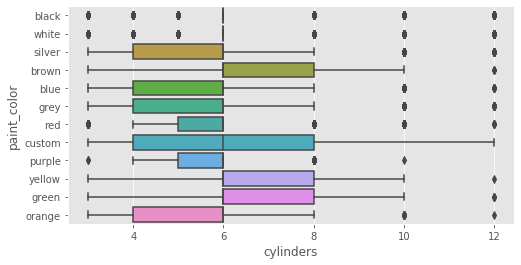

In [49]:
sns.boxplot(x="cylinders",y="paint_color",data=cleaned)

### Price attribute

In [99]:
print ("Top 10 most used price points:")
print (df_copy['price'].value_counts().iloc[:10])

Top 10 most used price points:
6995    4651
7995    4542
3500    4525
8995    4362
2500    4353
4500    4350
5995    4319
4995    4152
9995    4000
5500    3604
Name: price, dtype: int64


In [100]:
print (df_copy.price.describe())

count    4.659980e+05
mean     5.992131e+04
std      1.001272e+07
min      1.000000e+00
25%      5.000000e+03
50%      1.050000e+04
75%      1.895000e+04
max      3.600029e+09
Name: price, dtype: float64


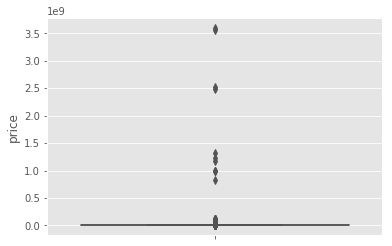

In [101]:
sns.boxplot(y=df_copy.price)

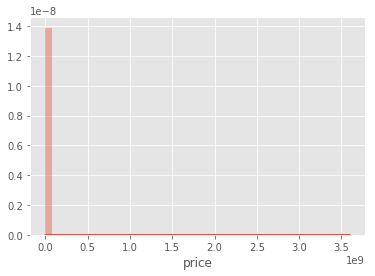

In [102]:
sns.distplot(df_copy.price)

We shouldnt be swayed by some of the figures above. This mean is close to 600k becuase of few car prices that are in the millions. On further anaysis of the prices column, I found that there were 43 cars that were being sold for values >600k. These include a $1,000,000 Ferrari and a $1,000,000,000 chevy! I could also see that there were a lot of dirty values such as 999,999,999 ans 123,456,789. We can safely conclude that the data is dirty and its upto us to refine it if we want to derive some valuable insights. Some possible reasons for dirt prices:

Users might have forgot to put a decial point. For eg: a Jeep Jeep Wrangler Rubicon 2018 starts at around 35,000. I saw a price for the same at 3,200,000.

We have to make some hard decisions now. There are way too many dubious values that hinder us from doind any kind of analysis. I saerch online for averge car prices this year. [Here](https://mediaroom.kbb.com/2018-02-01-Average-New-Car-Prices-Rise-Nearly-4-Percent-For-January-2018-On-Shifting-Sales-Mix-According-To-Kelley-Blue-Book) is an excellent link on the topic. Considering the worst case, we can take the High-end Luxury Car atrribute. Cars in this section start at an averge of arounf ~100k. I am willing to go to upto 150k for my analysis and droppping all other values.

We can also drop these extreme values in order to increase the power of price prediction.Firstly, cars that had listed as more than 100,000 are dropped which are 580 out of 550313.It address only small percentage of buyers and also cars that priced less than 750 were also dropped , because these are noise points.

In [103]:
df_copy.shape

(465998, 19)

In [104]:
df_copy = df_copy[(df_copy.price>=750)&(df_copy.price<150000)]

In [105]:
df_copy.shape

(454659, 19)

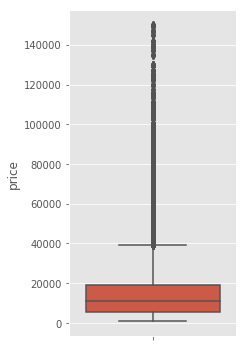

In [106]:
plt.figure(figsize=(3,6))
sns.boxplot(y='price', data=df_copy);

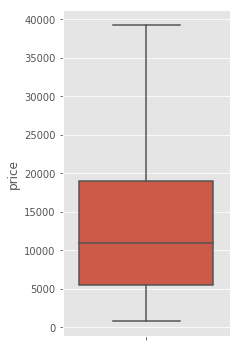

In [37]:
plt.figure(figsize=(3,6))
#sns.boxplot(y='price', data=df_copy);

sns.boxplot(y='price', data=df_copy,showfliers=False);

### Year Attribute

In [107]:
print ('Top 10 car manufacturing years:')
print (df_copy['year'].value_counts().iloc[:10])

Top 10 car manufacturing years:
2016.0    34620
2015.0    32094
2014.0    31082
2013.0    31013
2012.0    29761
2011.0    28185
2017.0    27725
2008.0    26706
2007.0    24517
2010.0    22232
Name: year, dtype: int64


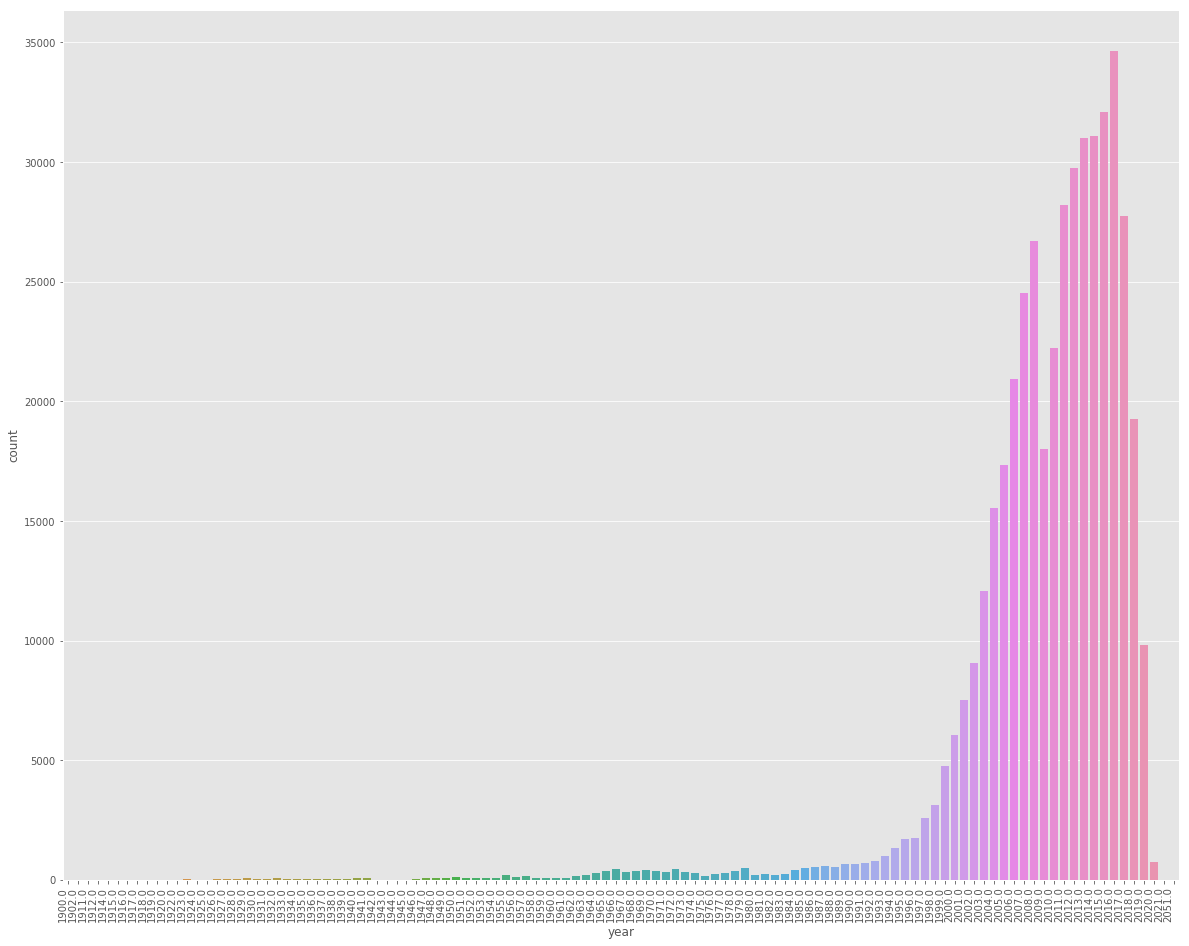

In [108]:
plt.figure(figsize=(20,16))
ax = sns.countplot(x='year',data=df_copy);
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right",fontsize=10);

In [109]:
sorted(df_copy.year.unique(),reverse=True)[:5]

[2051.0, 2021.0, 2020.0, 2019.0, 2018.0]

By reading through the wikipedia page of Automotive industry in the United States It seems that the car sales grew to large numbers during the 1960s. I will reduce the dataset further here and ignore years <1960.
We can see from the plot and the value counts , there are years 2051, 2021 , which were noise points and for a robust prediction we will be removing the models that are less that 1960

In [110]:
df_copy.year.shape

(454659,)

In [111]:
df_copy = df_copy[(df_copy.year != 2051) &(df_copy.year != 2021) & (df_copy.year>=1960)]

In [113]:
df_copy.year.shape

(452641,)

### Ranking Of Manufactures

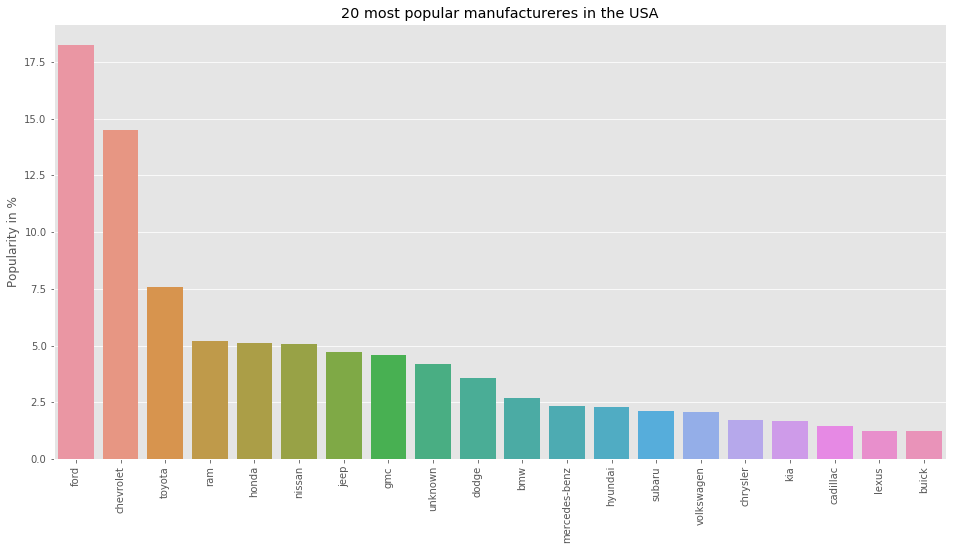

In [114]:
manufacturers = df_copy["manufacturer"].value_counts().div(len(df_copy)).mul(100)
manufactuters_TOP20 = manufacturers[:20]

plt.figure(figsize=(16,8))
sns.barplot(x=manufactuters_TOP20.index, y=manufactuters_TOP20.values)
plt.title("20 most popular manufactureres in the USA")
plt.ylabel("Popularity in %")
plt.xticks(rotation=90)
plt.show()

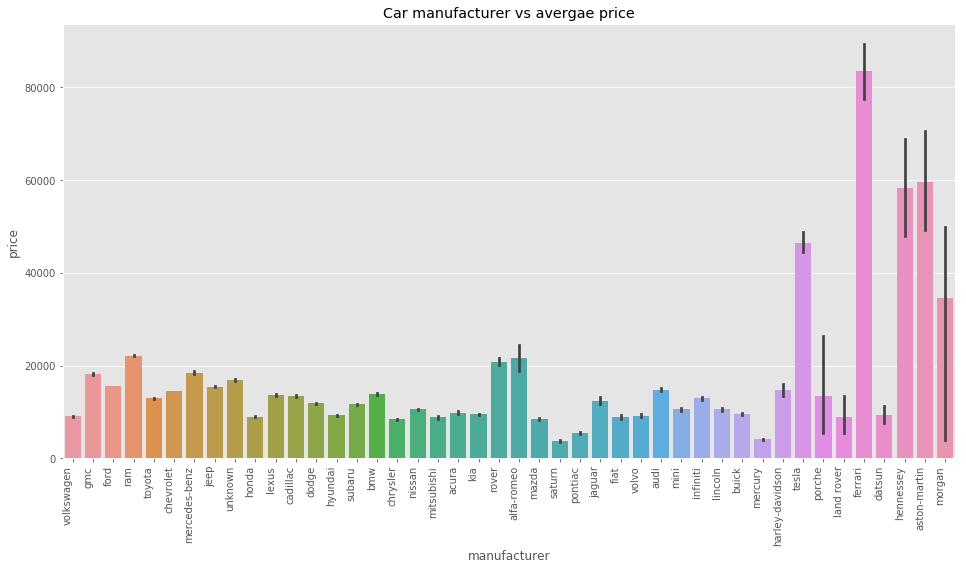

In [126]:
plt.figure(figsize=(16,8))
ax = sns.barplot(x='manufacturer', y='price', data=df_copy);
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right",fontsize=10);
plt.title("Car manufacturer vs avergae price");

As we can see the first and the second place are taken by american companies (Ford and Chevrolet). Then there are Japanese brands: Toyota, Nissan and Honda. And there is somethin new if you are European - RAM. This is a trucks and van manufacturer belonging to the italian Fiat company. Another less known in Europe brand is Buick - it's an american brand manufacturing luxury cars, however it's main market is China.

### Odometer

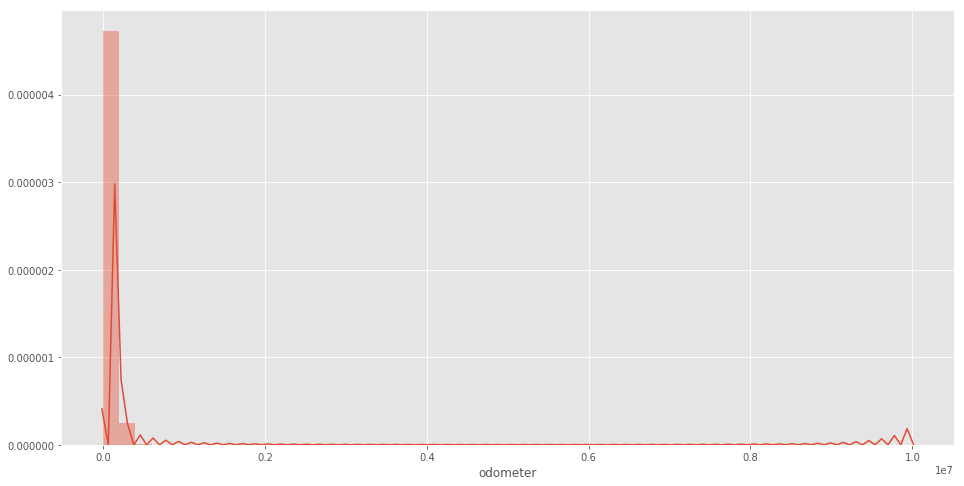

In [115]:
plt.figure(figsize=(16,8))
sns.distplot(df_copy.odometer)
plt.show()

Odometers higher than 300k and lower than 10 may not be good observations for a robust prediction:

In [116]:
df_copy.odometer.shape

(452641,)

In [132]:
df_copy=df_copy[(df_copy.odometer < 500000) & (df_copy.odometer > 10)]

In [133]:
df_copy.odometer.shape

(446992,)

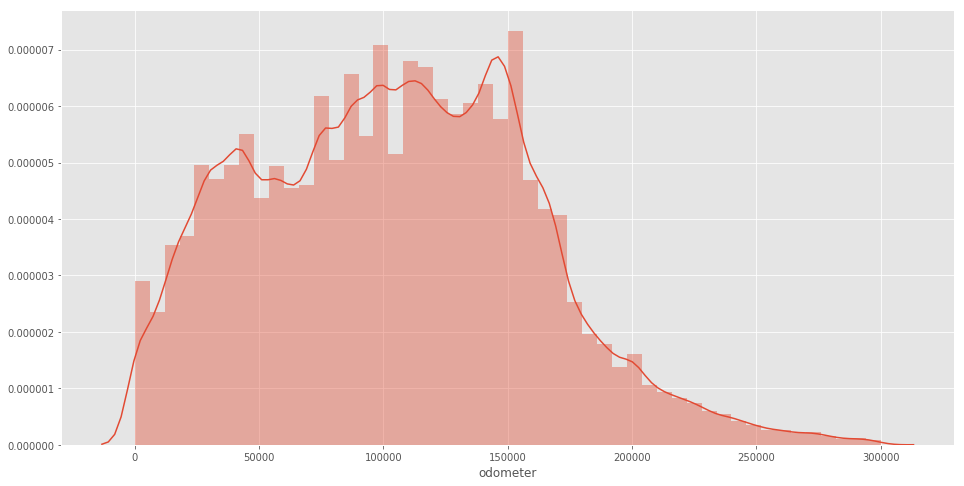

In [134]:
plt.figure(figsize=(16,8))
sns.distplot(df_copy.odometer)
plt.show()

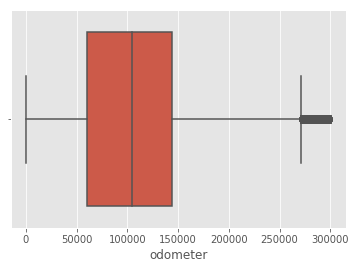

In [135]:
sns.boxplot(df_copy.odometer)

## Hypothesis Testing

Saving the data to new file

In [131]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 446992 entries, 0 to 465997
Data columns (total 19 columns):
id              446992 non-null int64
url             446992 non-null object
region          446992 non-null object
price           446992 non-null int64
year            446992 non-null float64
manufacturer    446992 non-null object
model           446992 non-null object
condition       446992 non-null object
cylinders       446992 non-null int64
fuel            446992 non-null object
odometer        446992 non-null float64
title_status    446992 non-null object
transmission    446992 non-null object
drive           446992 non-null int64
type            446992 non-null object
paint_color     446992 non-null object
state           446992 non-null object
lat             446992 non-null float64
long            446992 non-null float64
dtypes: float64(4), int64(4), object(11)
memory usage: 88.2+ MB


In [130]:
df_copy.to_csv("D:/github/dataSets/dpa_project/cleanedDataForModelling.csv",index=False)